In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt

# Concluding calibration remarks

- High volatility levels

- Indication for stochastic volatility

- Low jump indication

--------------------------------------

- Indication for infinite variation




## Volatility comparison 

In [2]:
SV = ['HESTON','SVJ','SVCJ']
MODELS = ['BLACK_SCHOLES','MERTON']

In [3]:
df = pd.read_csv(f'_output/calibration/results/20210227_195345/HESTON/parameters.csv',usecols=['date'])

for x in SV:
    df[x]= pd.read_csv(f'_output/calibration/results/20210227_195345/{x}/parameters.csv')['XI']
    df[x][df[x].idxmax()] =np.mean(df[x])
    

<ipython-input-3-c28065f00434>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x][df[x].idxmax()] =np.mean(df[x])


In [4]:
for x in MODELS:
    df[x] = pd.read_csv(f'_output/calibration/results/20210227_195345/{x}/parameters.csv')['SIGMA']


In [5]:
df['SVJ'][df['SVJ'].idxmax()] =np.mean(df['SVJ'])

<ipython-input-5-a12e8b5a2ea9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SVJ'][df['SVJ'].idxmax()] =np.mean(df['SVJ'])


In [6]:
df.date = pd.to_datetime(df.date,format='%Y%m%d')
df = df.sort_values(by='date')
df = df.set_index('date')

In [7]:
#df = df[(df.index >= '2019-04-01') & (df.index < '2019-10-01')]
#df = df[(df.index >= '2019-10-01') & (df.index < '2020-02-01')]
#df = df[(df.index >= '2020-02-01') & (df.index < '2020-07-01')]

In [8]:
SV_PLOT = {'HESTON':'purple','SVJ':'grey','SVCJ':'orange'}


In [9]:
SV_PLOT.items()

dict_items([('HESTON', 'purple'), ('SVJ', 'grey'), ('SVCJ', 'orange')])

### 3 separate pictures

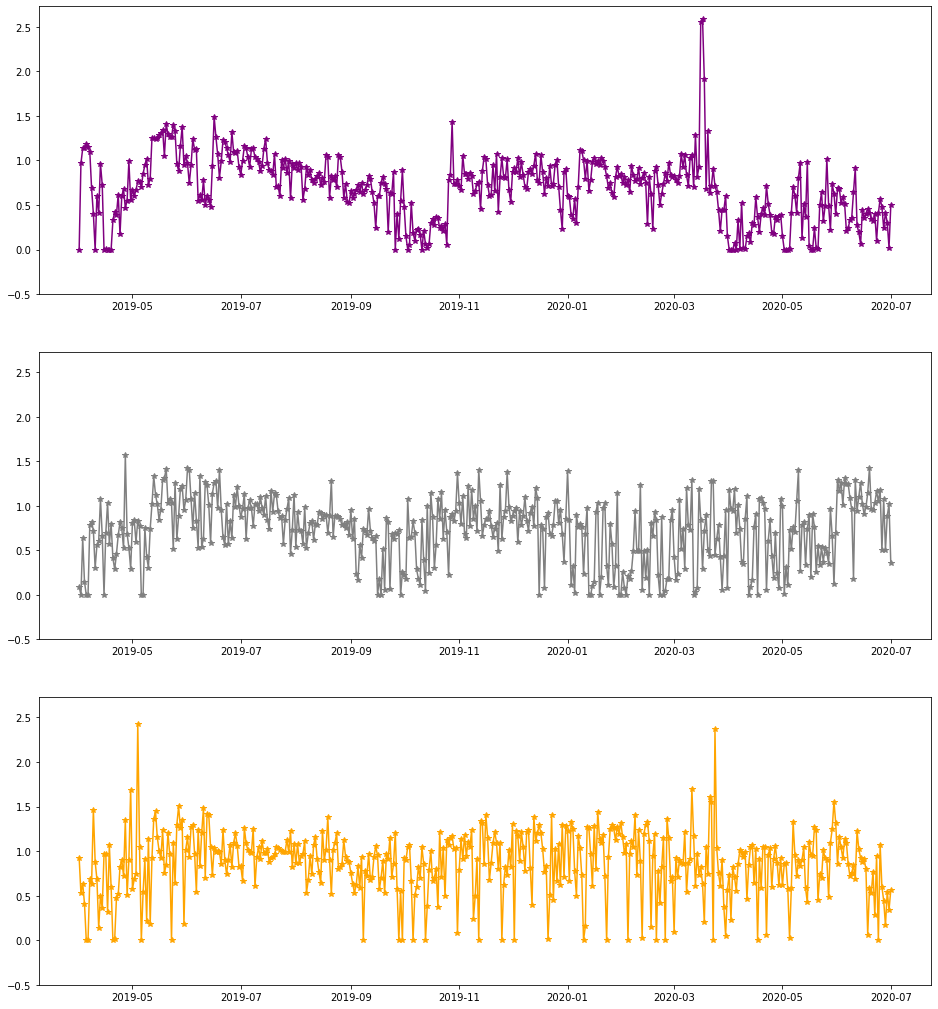

In [10]:
fig, axs = plt.subplots(nrows=3, figsize=(16, 18))

for (x, y), ax in zip(SV_PLOT.items(), axs):
    ax.plot(df[x], color=y, marker='*')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_ylim((-0.5,0.3 + max(df['SVCJ'])))



fig.savefig(f'_output/calibration/results/20210227_195345/plots/test.png',transparent=True)

In [11]:
df1 = df[(df.index >= '2019-04-01') & (df.index < '2019-10-01')]
df2 = df[(df.index >= '2019-10-01') & (df.index < '2020-02-01')]
df3 = df[(df.index >= '2020-02-01') & (df.index < '2020-07-01')]
SV_list = [df1,df2,df3]

In [12]:
summary = df1.describe()

for x in SV_list[1:]:
    summary = summary.append(x.describe())

In [13]:
summary = summary[['HESTON','SVJ','SVCJ']]
summary.index = ['count', '$\hat{\mu}$', '$\hat{\sigma}$', 'min', '$q_{25}$', '$q_{50}$', '$q_{75}$', 'max', 'count',
       '$\hat{\mu}$', '$\hat{\sigma}$', 'min', '$q_{25}$', '$q_{50}$', '$q_{75}$', 'max', 'count', '$\hat{\mu}$',
       '$\hat{\sigma}$', 'min', '$q_{25}$', '$q_{50}$', '$q_{75}$', 'max']

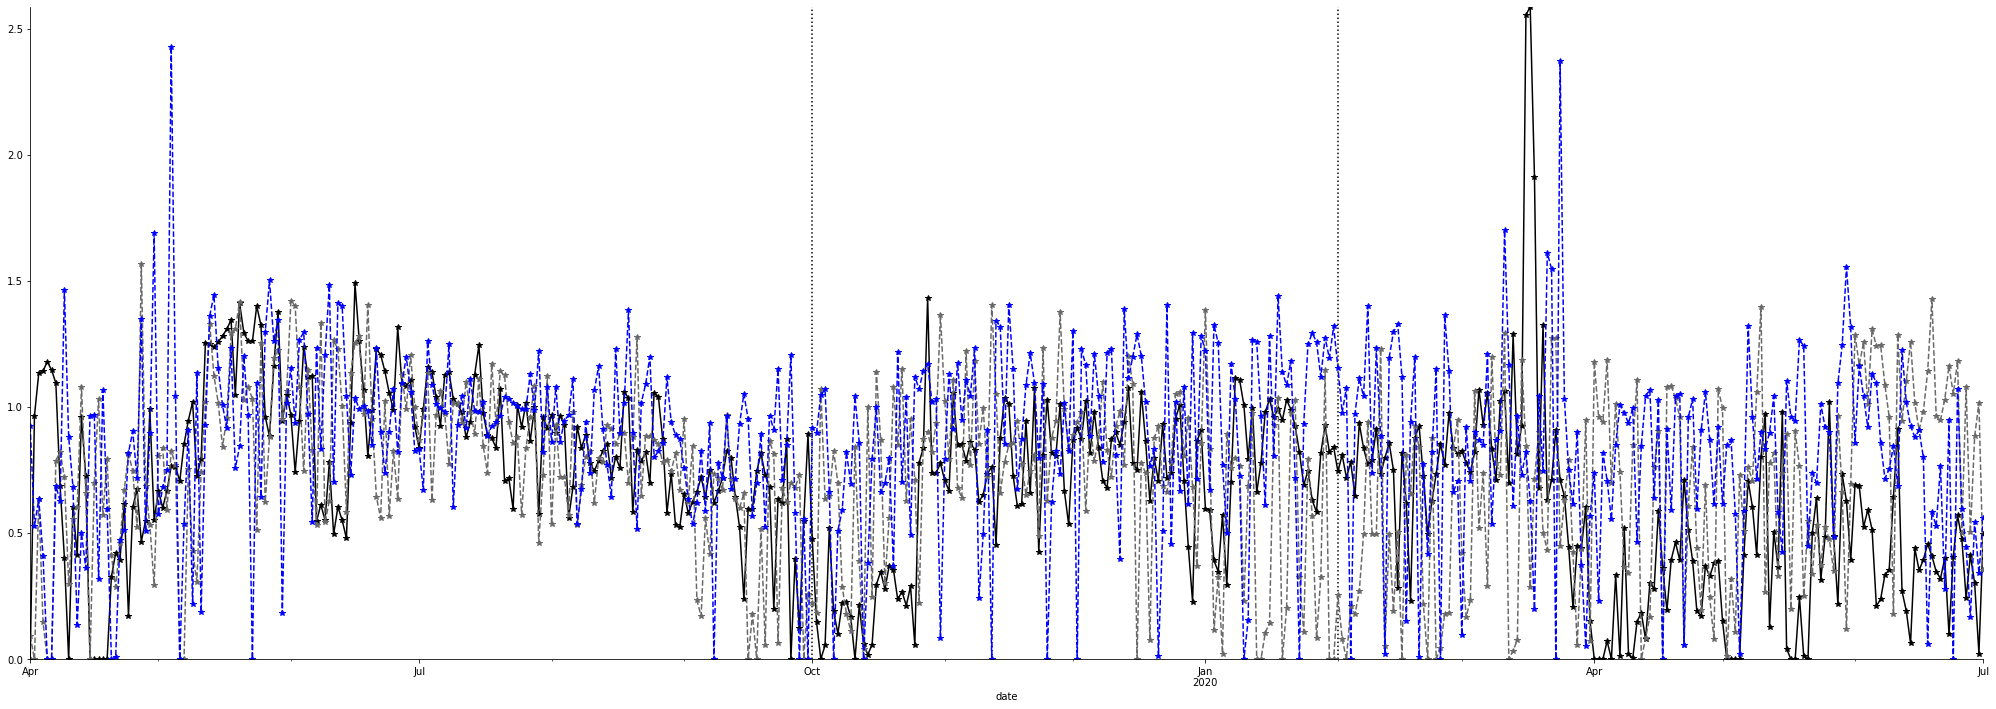

In [14]:
fig, ax = plt.subplots(figsize=(35, 12))
df['HESTON'].plot(ax=ax, label="Std", color = 'black',marker='*')
df['SVJ'].plot(ax=ax, label="Forecast", linestyle='dashed',color='dimgrey',marker='*')
df['SVCJ'].plot(ax=ax, label="Forecast", linestyle='dashed',color='blue',marker='*')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_ylim(ymin=0, ymax=np.max(df['HESTON']))

ax.vlines('2019-10-01', 0, ymax=np.max(df['HESTON']), colors='black',linestyles='dotted')
ax.vlines('2020-02-01', 0, ymax=np.max(df['HESTON']), colors='black',linestyles='dotted')

fig.savefig(f'_output/calibration/figures/VolVol_long.pdf',transparent=True)

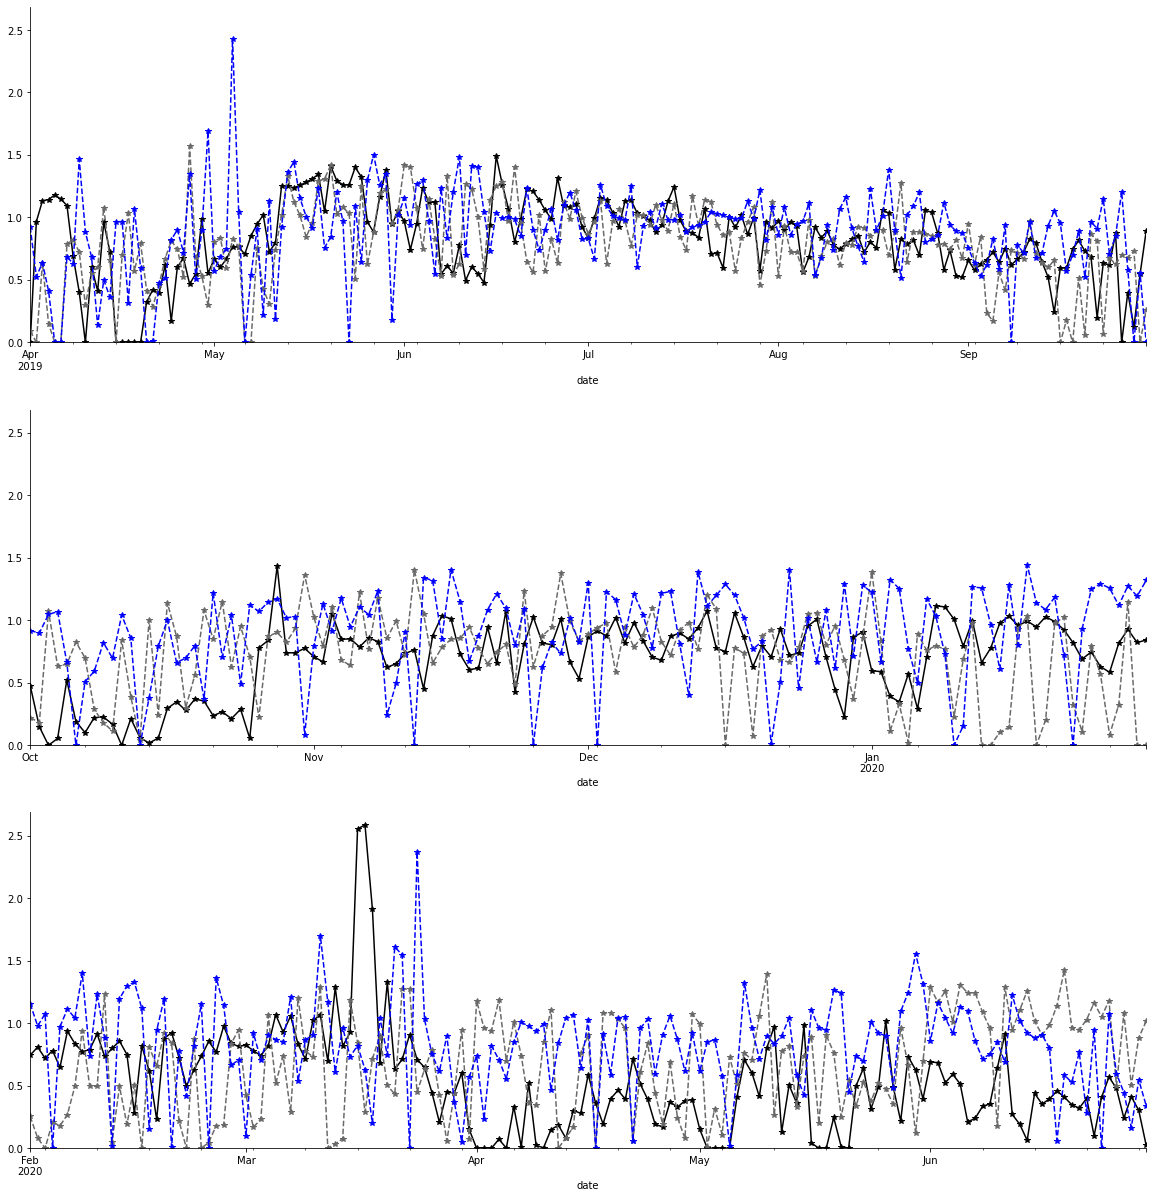

In [15]:
fig, axs = plt.subplots(nrows=3, figsize=(20, 21))


for idx, s in enumerate(SV_list):
    ax = axs[idx]
    #fig, ax = plt.subplots(figsize=(10, 4))
    s['HESTON'].plot(ax=ax, color = 'black',marker='*')
    s['SVJ'].plot(ax=ax,  linestyle='dashed',color='dimgray',marker='*')
    s['SVCJ'].plot(ax=ax,  linestyle='dashed',color='blue',marker='*')
    
# Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_ylim((0, 0.1+max(df['HESTON'])))
    
fig.savefig(f'_output/calibration/figures/volvol_3.pdf',transparent=True)
 

## Volatility comparison BS vs MERTON

In [16]:
sigmas = df[['BLACK_SCHOLES','MERTON']]
#sigmas.plot()

SIGMA_PLOT = {'BLACK_SCHOLES':'blue','MERTON':'darkgrey'}


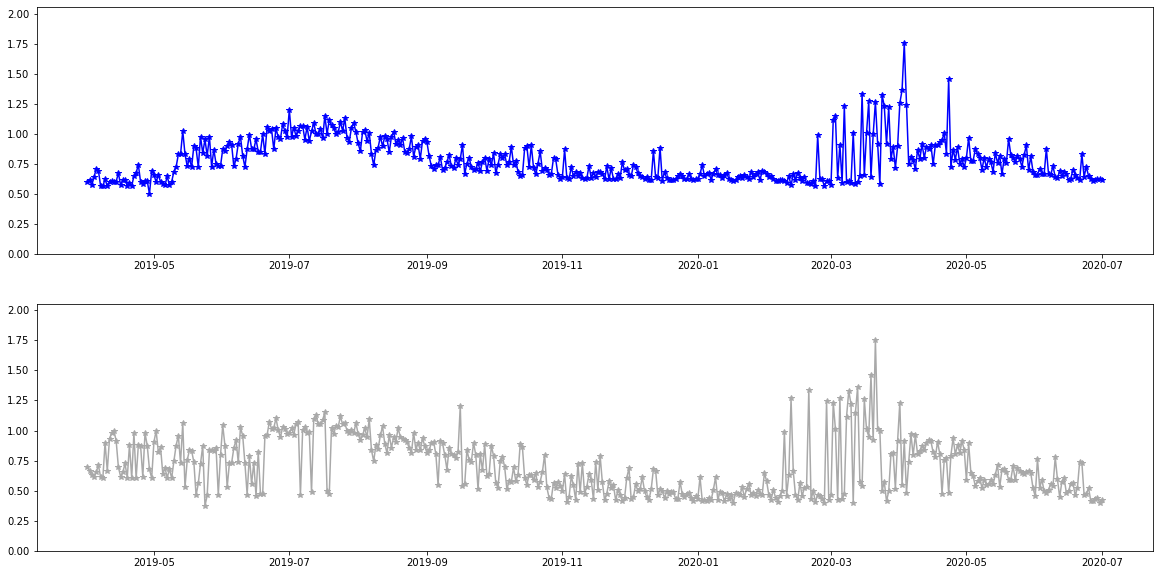

In [17]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 10))

for (x, y), ax in zip(SIGMA_PLOT.items(), axs):
    ax.plot(df[x], color=y, marker='*')
    ax.set_ylim((0,0.3 + max(df['BLACK_SCHOLES'])))


In [18]:
sigmas = df[['BLACK_SCHOLES','MERTON']]

#sigmas['BLACK_SCHOLES'][df['BLACK_SCHOLES'].idxmax()] =np.mean(df['BLACK_SCHOLES'])
#sigmas['MERTON'][df['MERTON'].idxmax()] =np.mean(df['MERTON'])

In [19]:
sigmas1 = sigmas[(sigmas.index >= '2019-04-01') & (sigmas.index < '2019-10-01')]
sigmas2 = sigmas[(sigmas.index >= '2019-10-01') & (sigmas.index < '2020-02-01')]
sigmas3 = sigmas[(sigmas.index >= '2020-02-01') & (sigmas.index < '2020-07-01')]

SIGMA = [sigmas1,sigmas2,sigmas3]

In [20]:
sigmas2.describe()

BLACK_SCHOLES      MERTON
count     123.000000  123.000000
mean        0.685431    0.533563
std         0.072696    0.106236
min         0.609593    0.400709
25%         0.632096    0.451280
50%         0.662908    0.506148
75%         0.711858    0.584039
max         0.905238    0.888981

### ONE PICTURE 

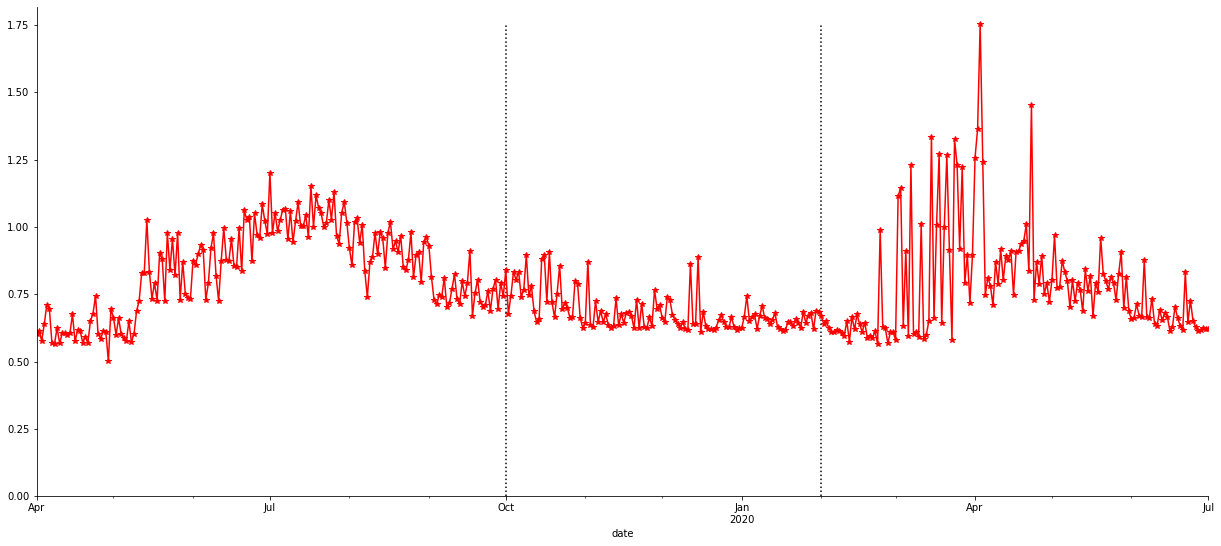

In [21]:
fig, ax = plt.subplots(figsize=(21, 9))
sigmas['BLACK_SCHOLES'].plot(ax=ax, label="Std", color = 'red',marker='*')
#sigmas['MERTON'].plot(ax=ax, label="Forecast", linestyle='dashed',color='red',marker='*')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_ylim(ymin=0)

ax.vlines('2019-10-01', 0, ymax=np.max(sigmas['BLACK_SCHOLES']), colors='black', linestyles='dotted') #, 
ax.vlines('2020-02-01', 0, ymax=np.max(sigmas['BLACK_SCHOLES']), colors='black', linestyles='dotted')

fig.savefig(f'_output/calibration/figures/bsjd_vol_dash.pdf', transparent=True)



### 3 PICTURES WITH DIFFERENT AXIS 

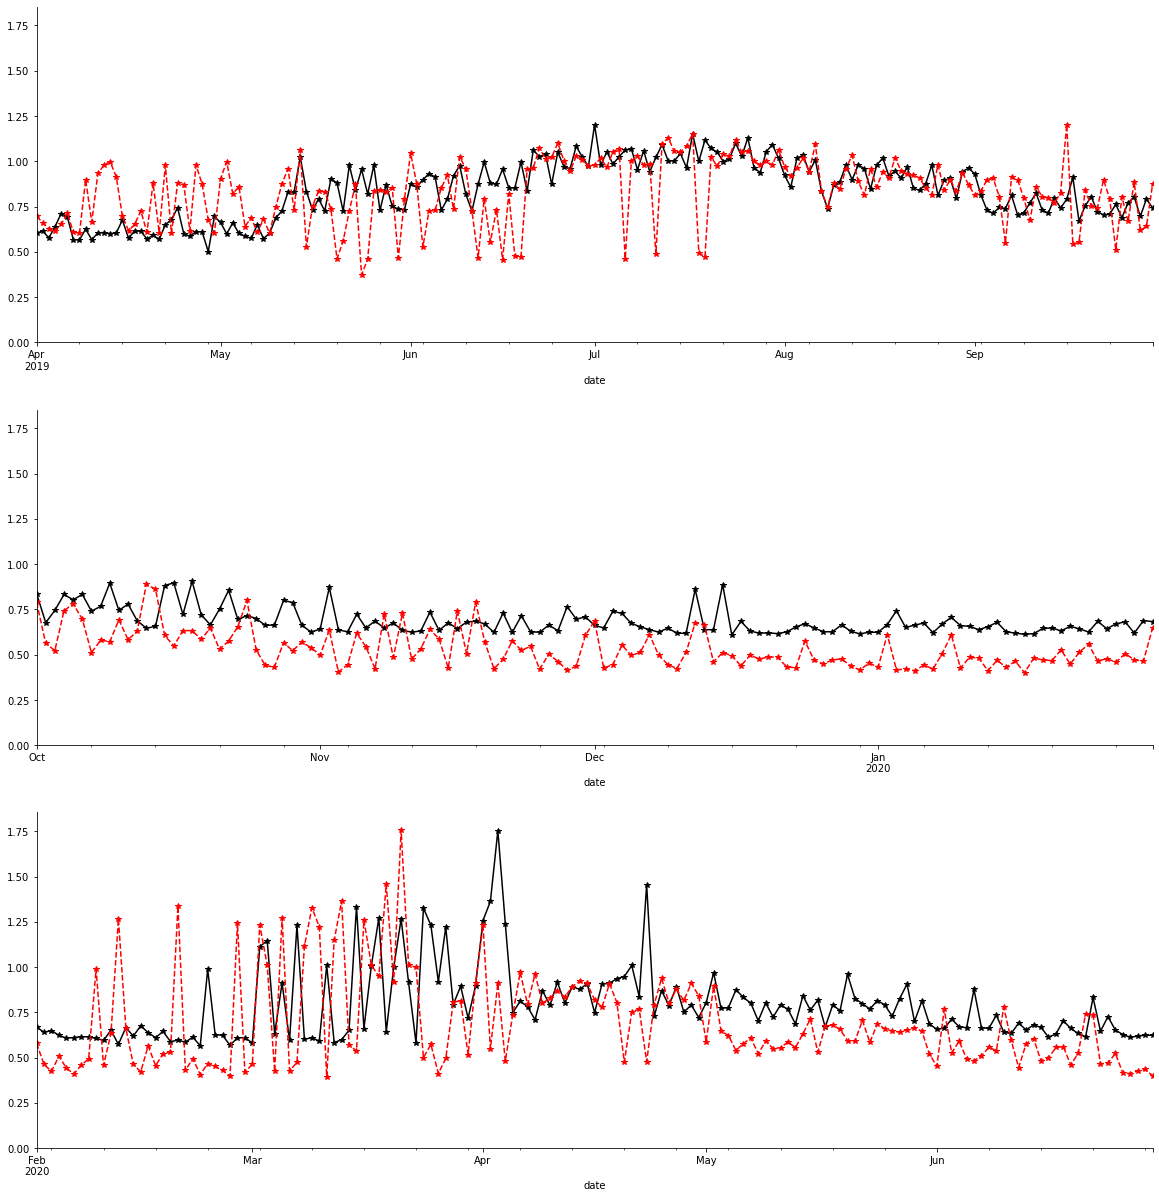

In [22]:
fig, axs = plt.subplots(nrows=3, figsize=(20, 21))


for idx, s in enumerate(SIGMA):
    ax = axs[idx]
    #fig, ax = plt.subplots(figsize=(10, 4))
    s['BLACK_SCHOLES'].plot(ax=ax, label="Std", color = 'black',marker='*')
    s['MERTON'].plot(ax=ax, label="Forecast", linestyle='dashed',color='red',marker='*')

# Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_ylim((0, 0.1+max(sigmas['BLACK_SCHOLES'])))
    
fig.savefig(f'_output/calibration/figures/bsjd_vol2.pdf')
 

## JUMP SIZE ANALYSIS $\lambda$

In [23]:
JUMP = ['MERTON','SVJ','SVCJ']  #'MERTON',

In [24]:
lambda_analysis = pd.read_csv(f'_output/calibration/results/20210227_195345/HESTON/parameters.csv',usecols=['date'])

In [25]:
for j in JUMP:
    lambda_analysis[j] = pd.read_csv(f'_output/calibration/results/20210227_195345/{j}/parameters.csv')['LAMBDA']
    

In [26]:
lambda_analysis.date = pd.to_datetime(lambda_analysis.date,format='%Y%m%d')
lambda_analysis = lambda_analysis.sort_values(by='date')
lambda_analysis = lambda_analysis.set_index('date')

### ONE PICTURE 

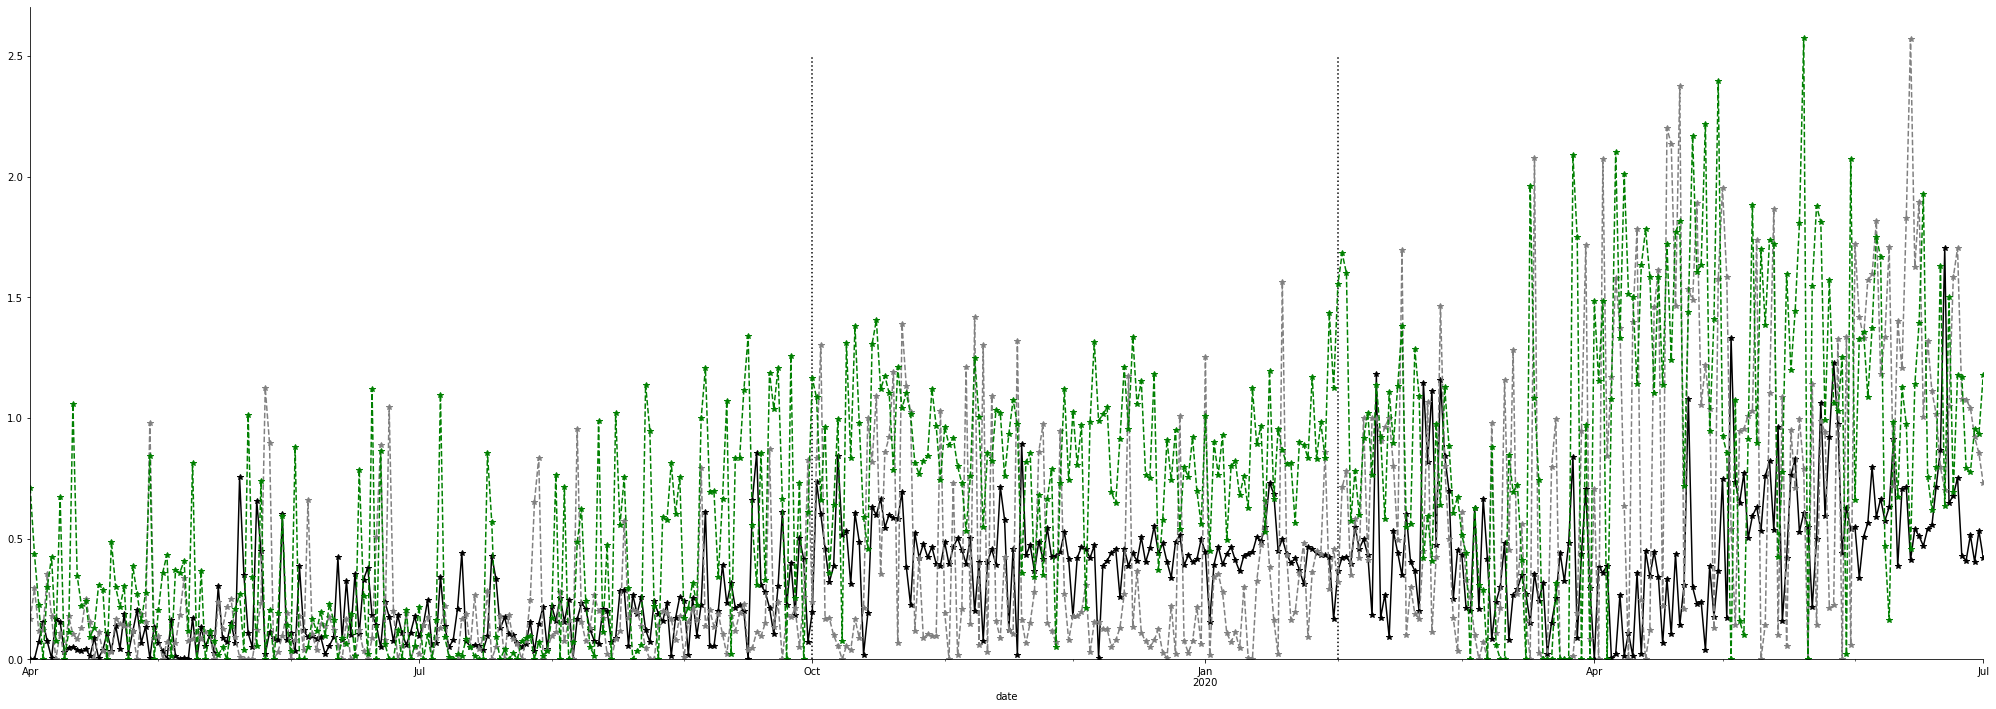

In [27]:
fig, ax = plt.subplots(figsize=(35, 12))
lambda_analysis['MERTON'].plot(ax=ax, label="Std", color = 'black',marker='*')
lambda_analysis['SVJ'].plot(ax=ax, label="Forecast", linestyle='dashed',color='gray',marker='*')
lambda_analysis['SVCJ'].plot(ax=ax, label="Forecast", linestyle='dashed',color='green',marker='*')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_ylim(ymin=0)

ax.vlines('2019-10-01', 0, ymax=2.5, colors='black',linestyles='dotted')
ax.vlines('2020-02-01', 0, ymax=2.5, colors='black',linestyles='dotted')

fig.savefig(f'_output/calibration/figures/lambda_long.pdf',transparent=True)


### MULTIPLE PICTURES

In [28]:
lambda_analysis1 = lambda_analysis[(lambda_analysis.index >= '2019-04-01') & (lambda_analysis.index < '2019-10-01')]
lambda_analysis2 = lambda_analysis[(lambda_analysis.index >= '2019-10-01') & (lambda_analysis.index < '2020-02-01')]
lambda_analysis3 = lambda_analysis[(lambda_analysis.index >= '2020-02-01') & (lambda_analysis.index < '2020-07-01')]

LAMBDA_ANALYSIS = [lambda_analysis1,lambda_analysis2,lambda_analysis3]

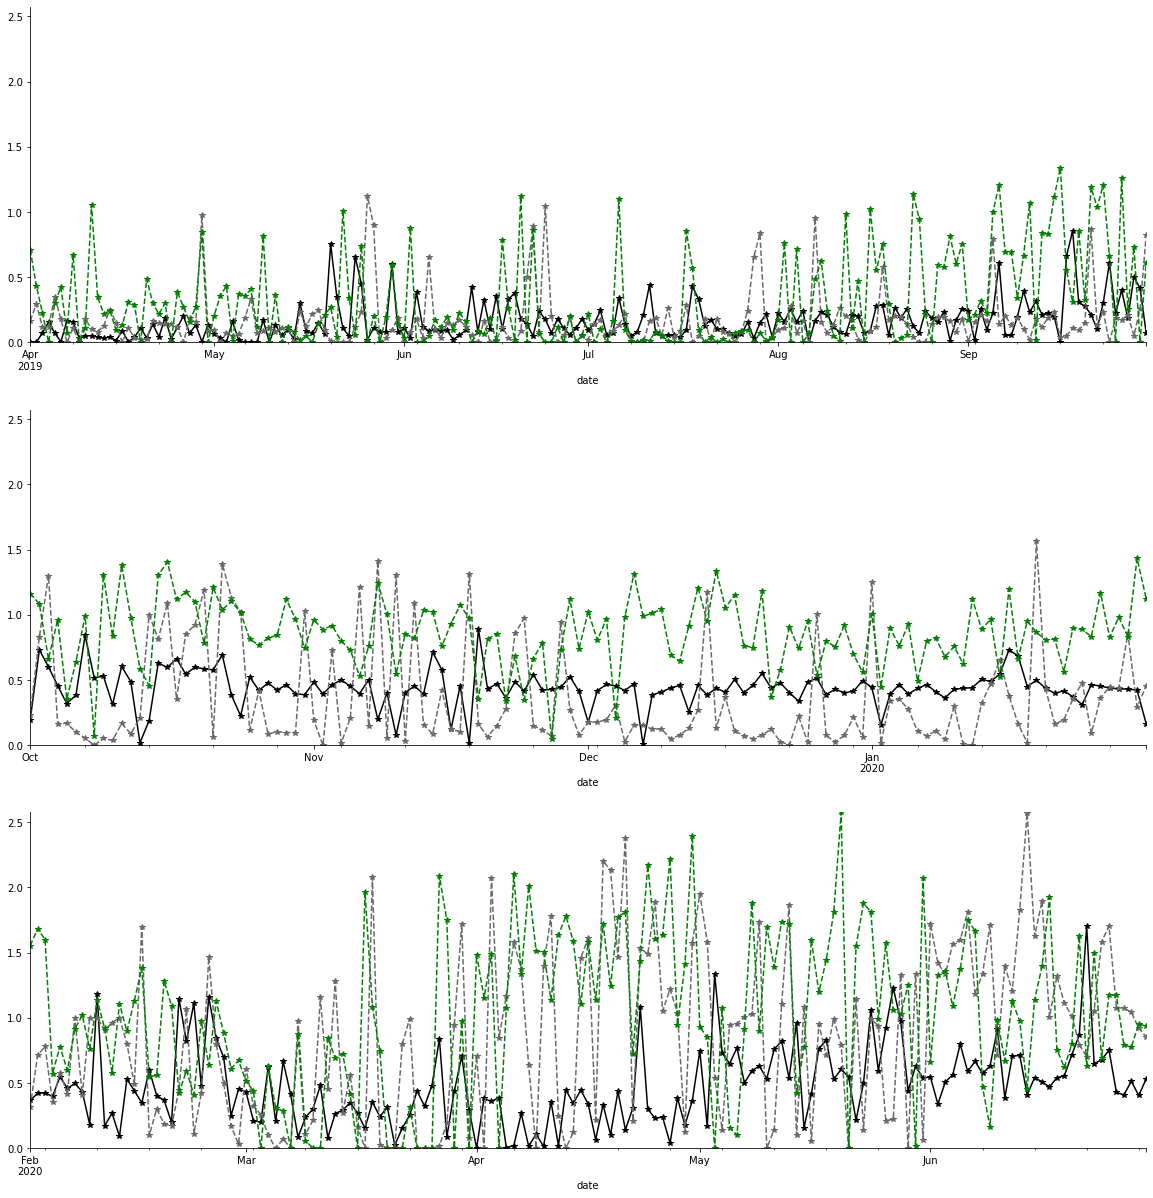

In [29]:
fig, axs = plt.subplots(nrows=3, figsize=(20, 21))

for idx, l in enumerate(LAMBDA_ANALYSIS):
    
    ax = axs[idx]
    
    l['MERTON'].plot(ax=ax, label="Std", color = 'black',marker='*')
    l['SVJ'].plot(ax=ax, label="Forecast", linestyle='dashed',color='dimgrey',marker='*')
    l['SVCJ'].plot(ax=ax, label="Forecast", linestyle='dashed',color='green',marker='*')
    
# Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_ylim((0, max(lambda_analysis['SVCJ'])))

fig.savefig(f'_output/calibration/figures/lambda_all.pdf',transparent=True)
    


<ipython-input-30-bfbdf5822629>:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "linestyles" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(f'_output/calibration/figures/lambda_interplay.pdf',transparent=True, linestyles='dotted')


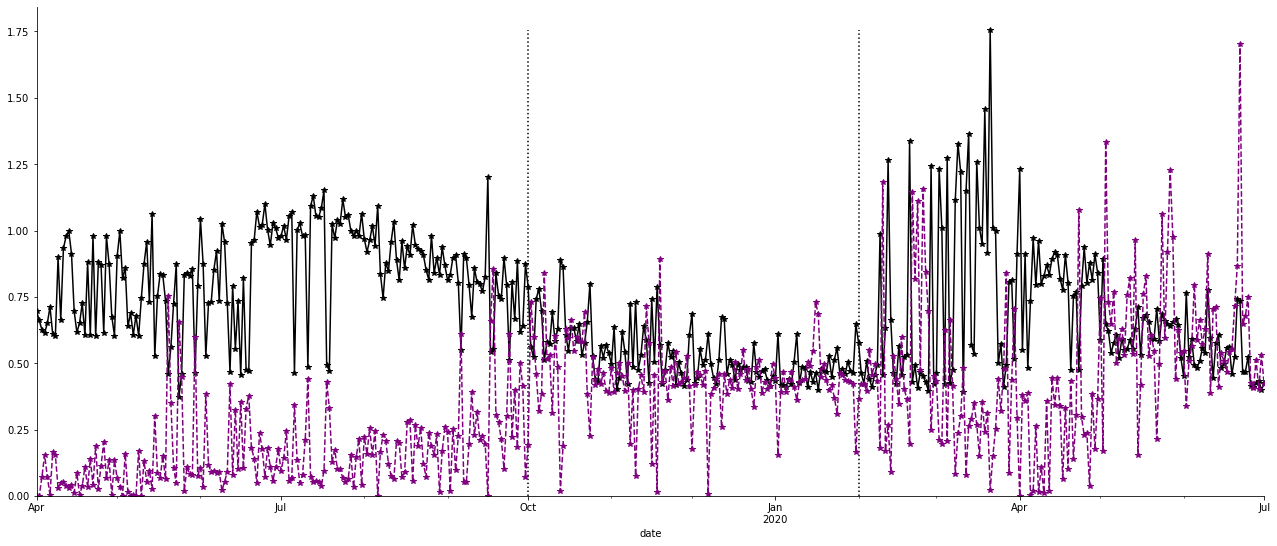

In [30]:
fig, ax = plt.subplots(figsize=(22, 9))
sigmas['MERTON'].plot(ax=ax, label="Std", color = 'black',marker='*')
lambda_analysis['MERTON'].plot(ax=ax, label="Forecast", linestyle='dashed',color='purple',marker='*')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_ylim(ymin=0)

ax.vlines('2019-10-01', 0, ymax=np.max(sigmas['MERTON']), colors='black', linestyles='dotted')
ax.vlines('2020-02-01', 0, ymax=np.max(sigmas['MERTON']), colors='black', linestyles='dotted')

fig.savefig(f'_output/calibration/figures/lambda_interplay.pdf',transparent=True, linestyles='dotted')

### RHO

In [31]:
rho = pd.read_csv(f'_output/calibration/results/20210227_195345/HESTON/parameters.csv',usecols=['date'])

for x in SV:
    rho[x]= pd.read_csv(f'_output/calibration/results/20210227_195345/{x}/parameters.csv')['RHO']
    rho[x][rho[x].idxmax()] =np.mean(rho[x])
    

<ipython-input-31-b2e606a6ead7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rho[x][rho[x].idxmax()] =np.mean(rho[x])


In [32]:
rho.date = pd.to_datetime(rho.date,format='%Y%m%d')
rho = rho.sort_values(by='date')
rho = rho.set_index('date')

In [33]:
rho['SVJ'][rho['SVJ'].idxmin()] =np.mean(rho['SVJ'])

In [34]:
rho['HESTON'][rho['HESTON'].idxmin()] =np.mean(rho['HESTON'])

In [35]:
rho1 = rho[(rho.index >= '2019-04-01') & (rho.index < '2019-10-01')]
rho2 = rho[(rho.index >= '2019-10-01') & (rho.index < '2020-02-01')]
rho3 = rho[(rho.index >= '2020-02-01') & (rho.index < '2020-07-01')]

SV_list_2 = [rho1,rho2,rho3]

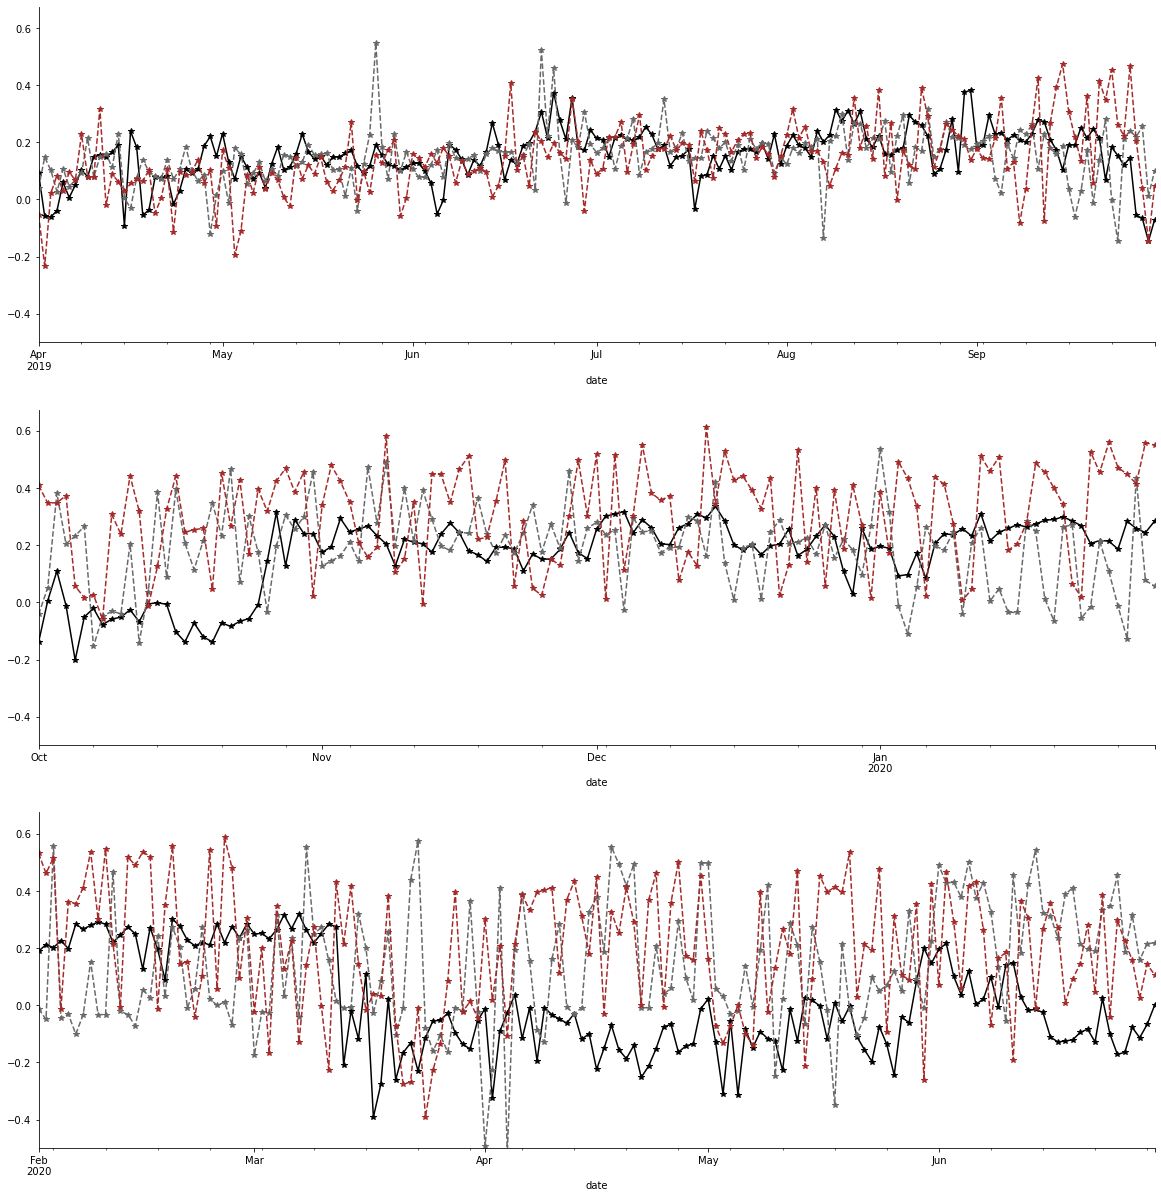

In [36]:
fig, axs = plt.subplots(nrows=3, figsize=(20, 21))


for idx, s in enumerate(SV_list_2):
    ax = axs[idx]
    #fig, ax = plt.subplots(figsize=(10, 4))
    s['HESTON'].plot(ax=ax, color = 'black',marker='*')
    s['SVJ'].plot(ax=ax,  linestyle='dashed',color='dimgray',marker='*')
    s['SVCJ'].plot(ax=ax,  linestyle='dashed',color='brown',marker='*')
    
# Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_ylim((-.5, 0.1+max(rho['SVJ'])))
    
fig.savefig(f'_output/calibration/figures/rho_3.pdf',transparent=True)

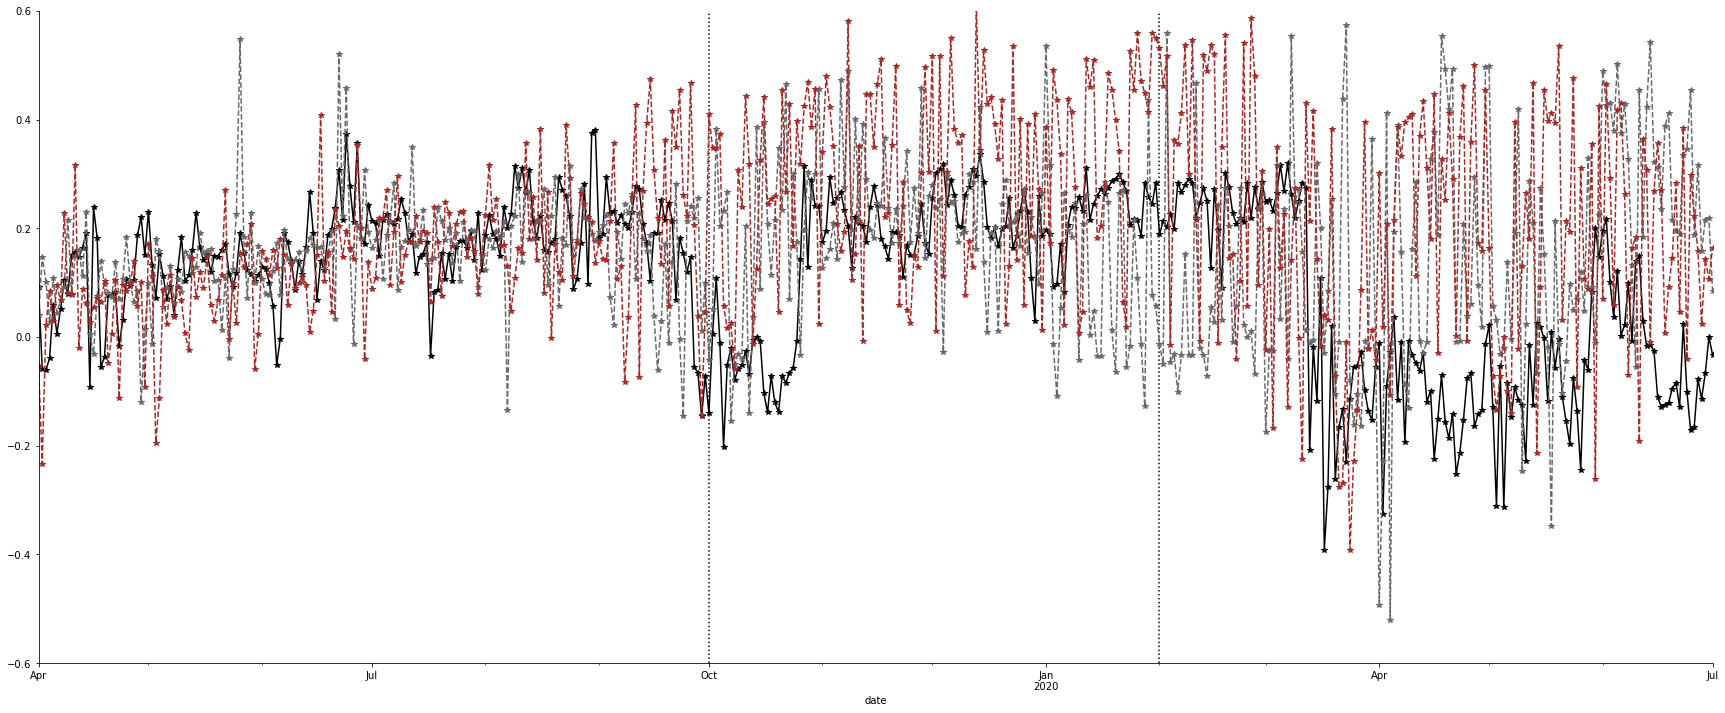

In [37]:
fig, ax = plt.subplots(figsize=(30, 12))
#fig, ax = plt.subplots(figsize=(35, 12))
rho['HESTON'].plot(ax=ax, label="Std", color = 'black',marker='*')
rho['SVJ'].plot(ax=ax, label="Forecast", linestyle='dashed',color='dimgray',marker='*')
rho['SVCJ'].plot(ax=ax, label="Forecast", linestyle='dashed',color='brown',marker='*')


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_ylim(ymin=-0.6,ymax=0.6)

ax.vlines('2019-10-01', -0.6, ymax=0.6, colors='black', linestyles='dotted') #, 
ax.vlines('2020-02-01', -0.6, ymax=0.6, colors='black', linestyles='dotted')

fig.savefig(f'_output/calibration/figures/sv_rho_one.pdf', transparent=True)





In [38]:
def read_models(models,parameter):
    df = pd.read_csv(f'_output/calibration/results/20210227_195345/BLACK_SCHOLES/parameters.csv',usecols=['date'])
    for x in models:
        df[x] = pd.read_csv(f'_output/calibration/results/20210227_195345/{x}/parameters.csv')[parameter]
        df[x][df[x].idxmax()] =np.mean(df[x])
    #Fix date index
    df.date = pd.to_datetime(df.date,format='%Y%m%d')
    df = df.sort_values(by='date')
    df = df.set_index('date')
    
    return df

# Split

def list_split(df):
    df1 = df[(df.index >= '2019-04-01') & (df.index < '2019-10-01')]
    df2 = df[(df.index >= '2019-10-01') & (df.index < '2020-02-01')]
    df3 = df[(df.index >= '2020-02-01') & (df.index < '2020-07-01')]
    liste = [df1,df2,df3]
    return liste

In [39]:
kappa = read_models(SV,'VBAR')

kappa_split = list_split(kappa)

<ipython-input-38-a834d2302498>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x][df[x].idxmax()] =np.mean(df[x])


<AxesSubplot:xlabel='date'>

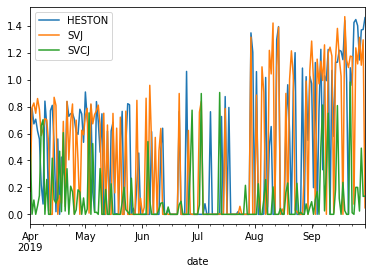

In [40]:
kappa_split[0].plot()

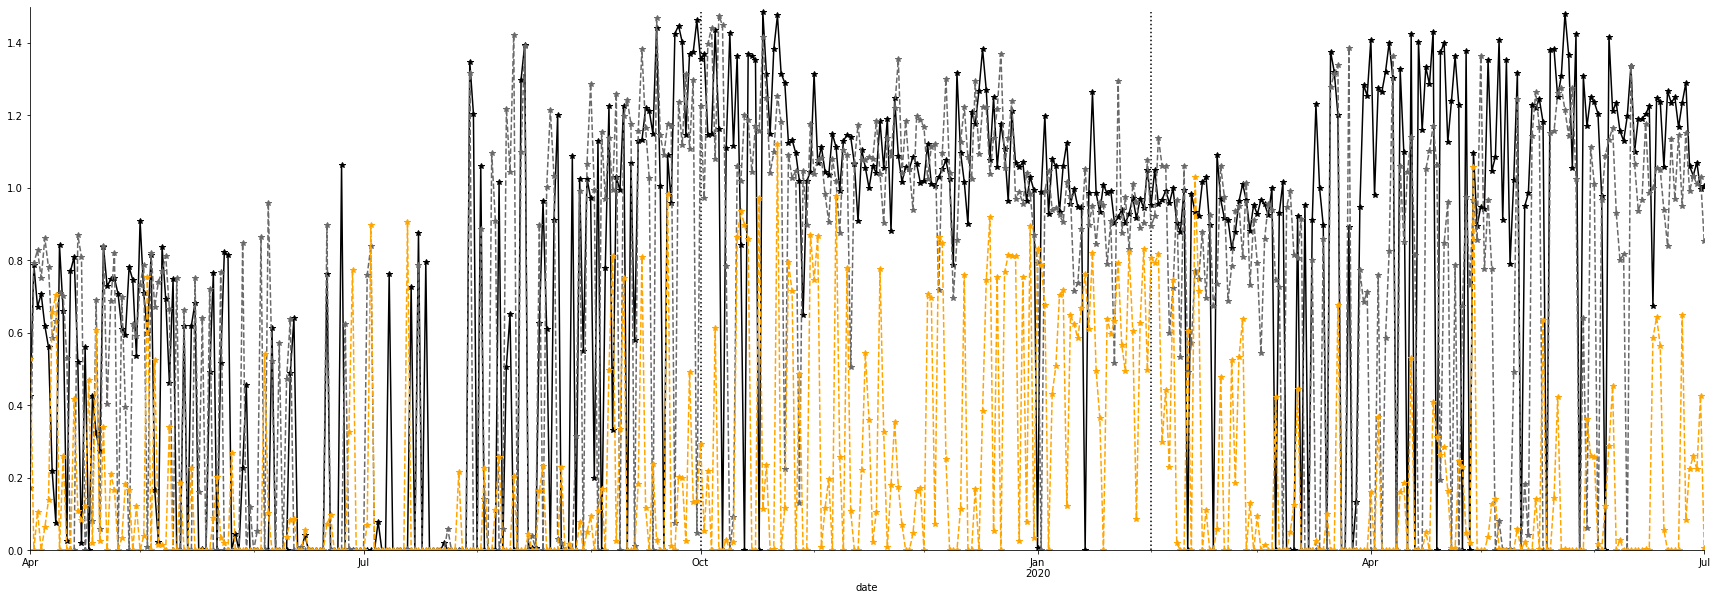

In [41]:
fig, ax = plt.subplots(figsize=(30, 10))
kappa['HESTON'].plot(ax=ax, label="Std", color = 'black',marker='*')
kappa['SVJ'].plot(ax=ax, label="Forecast", linestyle='dashed',color='dimgray',marker='*')
kappa['SVCJ'].plot(ax=ax, label="Forecast", linestyle='dashed',color='orange',marker='*')


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_ylim(ymin=0,ymax=1.5)

ax.vlines('2019-10-01', 0, ymax=np.max(kappa['HESTON']), colors='black', linestyles='dotted') #, 
ax.vlines('2020-02-01', 0, ymax=np.max(kappa['HESTON']), colors='black', linestyles='dotted')

fig.savefig(f'_output/calibration/figures/bsjd_vol.pdf', transparent=True)

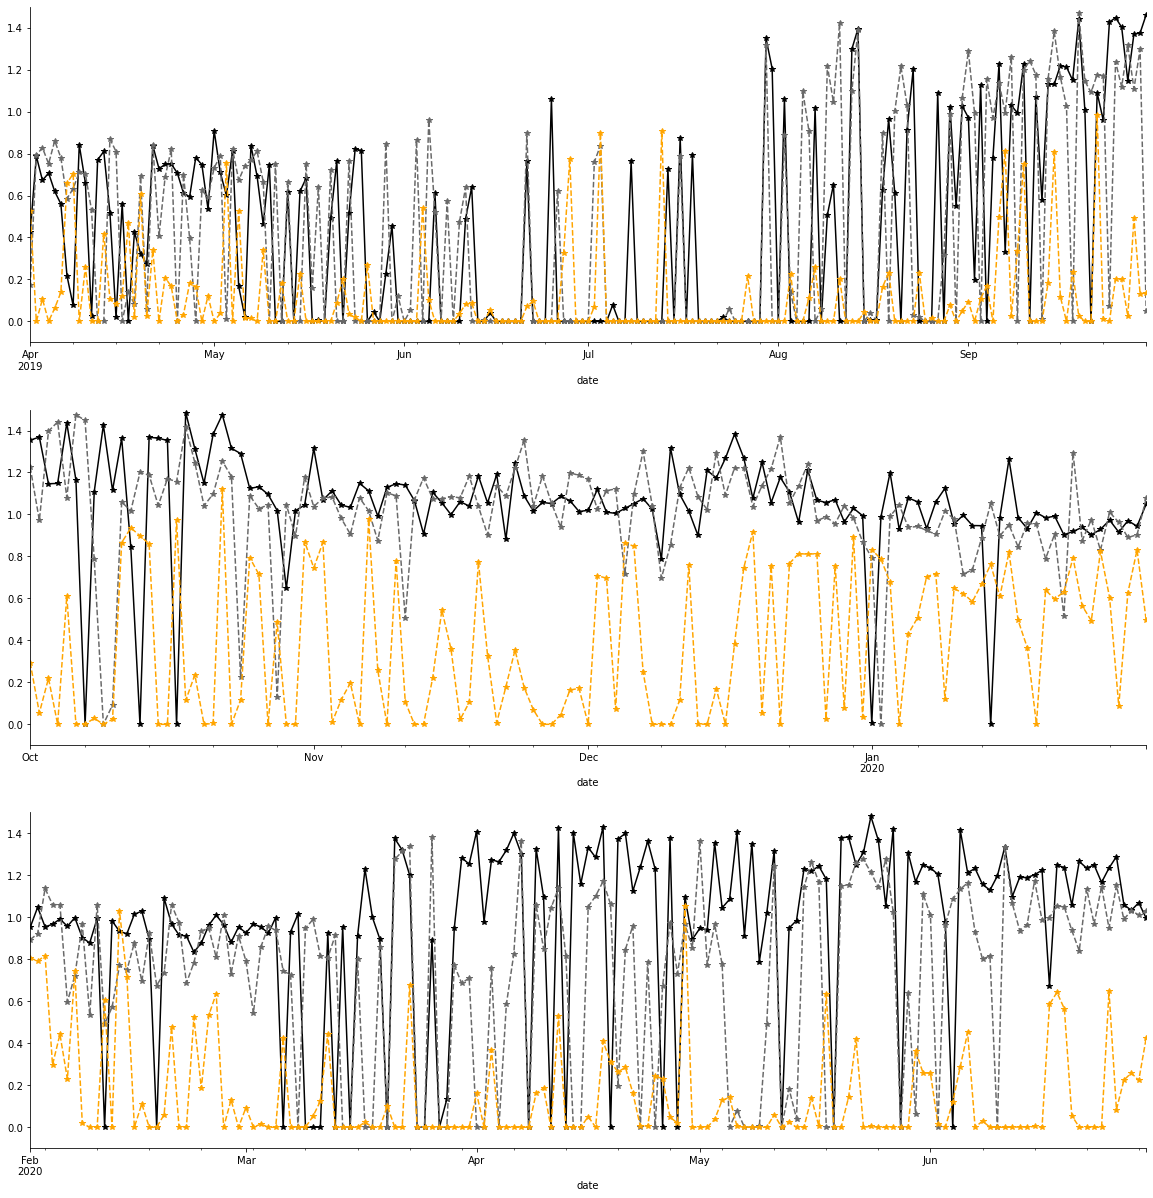

In [42]:
fig, axs = plt.subplots(nrows=3, figsize=(20, 21))


for idx, s in enumerate(kappa_split):
    ax = axs[idx]
    #fig, ax = plt.subplots(figsize=(10, 4))
    s['HESTON'].plot(ax=ax, color = 'black',marker='*')
    s['SVJ'].plot(ax=ax,  linestyle='dashed',color='dimgray',marker='*')
    s['SVCJ'].plot(ax=ax,  linestyle='dashed',color='orange',marker='*')
    
# Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_ylim((-0.1, 1.5))
    
fig.savefig(f'_output/calibration/figures/VBAR_3.pdf',transparent=True)

In [43]:
crix = pd.read_csv(f'_input/crix.csv')
crix.date = pd.to_datetime(crix.date,format='%Y-%m-%d')
crix = crix.sort_values(by='date')
crix = crix.set_index('date')

crix = crix[(crix.index >= '2019-04-01') & (crix.index < '2020-07-01')]

In [44]:
vcrix = pd.read_csv(f'_input/vcrix.csv')
vcrix = vcrix.drop_duplicates(keep='first')
vcrix.date = pd.to_datetime(vcrix.date,format='%Y-%m-%d')
vcrix = vcrix.sort_values(by='date')
vcrix = vcrix.set_index('date')

vcrix = vcrix[(vcrix.index >= '2019-04-01') & (vcrix.index < '2020-07-01')]

In [45]:
crix1 = crix[(crix.index >= '2019-04-01') & (crix.index < '2019-10-01')]
crix2 = crix[(crix.index >= '2019-10-01') & (crix.index < '2020-02-01')]
crix3 = crix[(crix.index >= '2020-02-01') & (crix.index < '2020-07-01')]

crix_all = [crix1,crix2,crix3]

In [46]:
for x in crix_all:
    rho_p = x.corr(method='pearson')
    print(round(rho_p,2))
    
    

     v
v  1.0
     v
v  1.0
     v
v  1.0


In [47]:
cgmy = pd.read_csv(f'_output/calibration/results/20210227_195345/CGMY/parameters.csv',usecols=['date','C','G','M','Y'])

In [48]:
cgmy.date = pd.to_datetime(cgmy.date,format='%Y%m%d')
cgmy = cgmy.sort_values(by='date')
cgmy = cgmy.set_index('date')

In [49]:
cgmy1 = cgmy[(cgmy.index >= '2019-04-01') & (cgmy.index < '2019-10-01')]
cgmy2 = cgmy[(cgmy.index >= '2019-10-01') & (cgmy.index < '2020-02-01')]
cgmy3 = cgmy[(cgmy.index >= '2020-02-01') & (cgmy.index < '2020-07-01')]

cgmy_list = [cgmy1,cgmy2,cgmy3]

<ipython-input-50-e0fc4a4809f6>:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "linestyles" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(f'_output/calibration/figures/infinite_activity.pdf',transparent=True, linestyles='dotted')


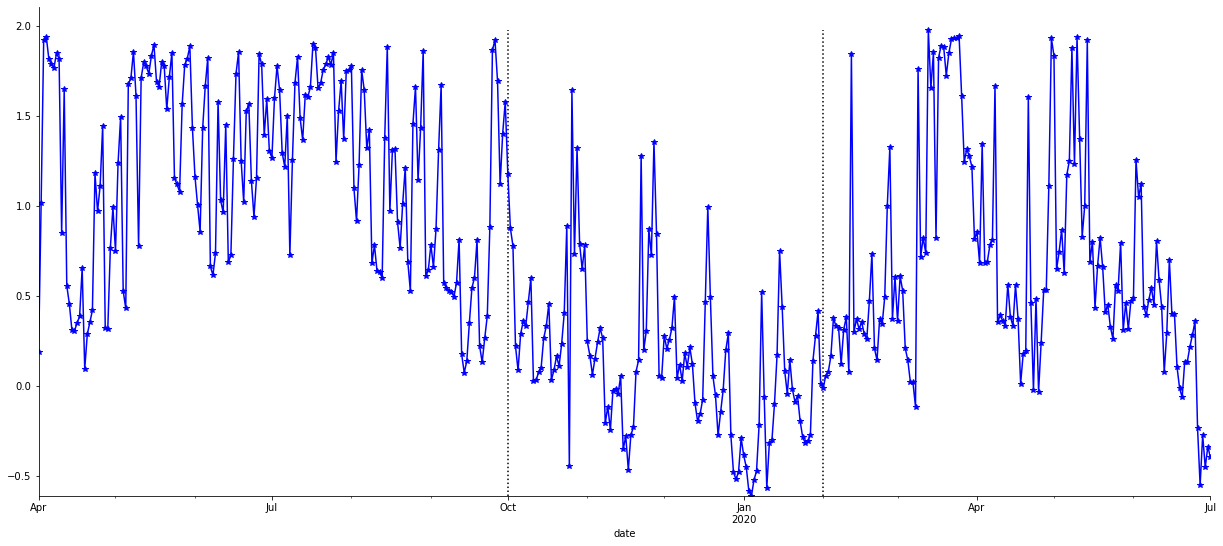

In [50]:
fig, ax = plt.subplots(figsize=(21, 9))
cgmy['Y'].plot(ax=ax, label="Std", color = 'blue',marker='*')
#lambda_analysis['MERTON'].plot(ax=ax, label="Forecast", linestyle='dashed',color='purple',marker='*')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_ylim(ymin=np.min(cgmy['Y']))

ax.vlines('2019-10-01', ymin= np.min(cgmy['Y']), ymax=np.max(cgmy['Y']), colors='black', linestyles='dotted')
ax.vlines('2020-02-01', ymin= np.min(cgmy['Y']), ymax=np.max(cgmy['Y']), colors='black', linestyles='dotted')

fig.savefig(f'_output/calibration/figures/infinite_activity.pdf',transparent=True, linestyles='dotted')

In [51]:
jumps_dir = {'G':'black','M':'red'}

<ipython-input-52-1175ba4972ad>:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "linestyles" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(f'_output/calibration/figures/{j}.pdf',transparent=True, linestyles='dotted')
<ipython-input-52-1175ba4972ad>:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "linestyles" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(f'_output/calibration/figures/{j}.pdf',transparent=True, linestyles='dotted')


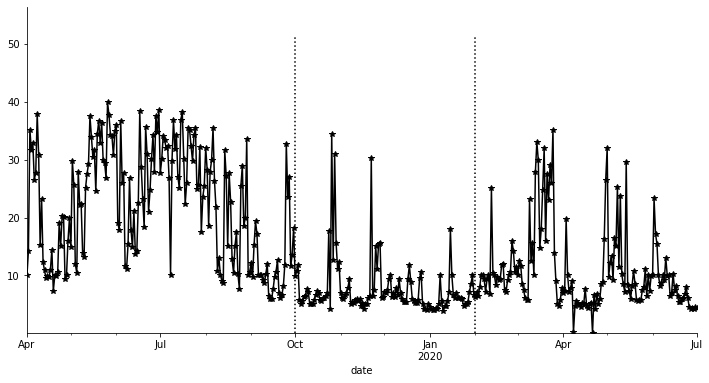

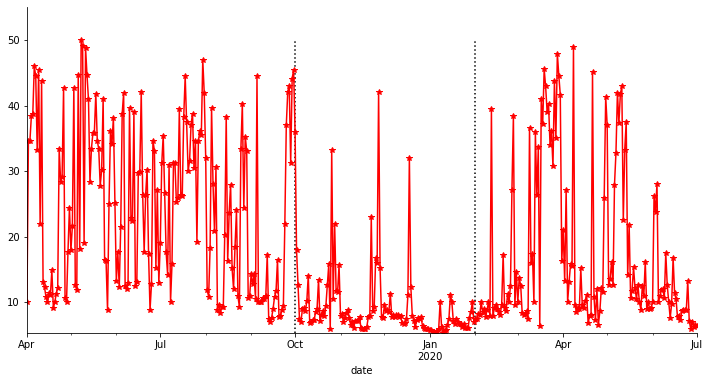

In [52]:
for j,m in jumps_dir.items():
    cgmy[j][cgmy[j].idxmax()] =np.mean(cgmy[j])
    fig, ax = plt.subplots(figsize=(12, 6))
    cgmy[j].plot(ax=ax, label="Std", color = m,marker='*')
#lambda_analysis['MERTON'].plot(ax=ax, label="Forecast", linestyle='dashed',color='purple',marker='*')

# Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ax.set_ylim(ymin=np.min(cgmy[j]),ymax=np.max(cgmy['M']+5))

    ax.vlines('2019-10-01', ymin= np.min(cgmy[j]), ymax=np.max(cgmy['M']), colors='black', linestyles='dotted')
    ax.vlines('2020-02-01', ymin= np.min(cgmy[j]), ymax=np.max(cgmy['M']), colors='black', linestyles='dotted')

    fig.savefig(f'_output/calibration/figures/{j}.pdf',transparent=True, linestyles='dotted')

In [53]:
vg = pd.read_csv(f'_output/calibration/results/20210227_195345/VARIANCE_GAMMA/parameters.csv',usecols=['date','SIGMA'])
vg.date = pd.to_datetime(vg.date,format='%Y%m%d')
vg = vg.sort_values(by='date')
vg = vg.set_index('date')

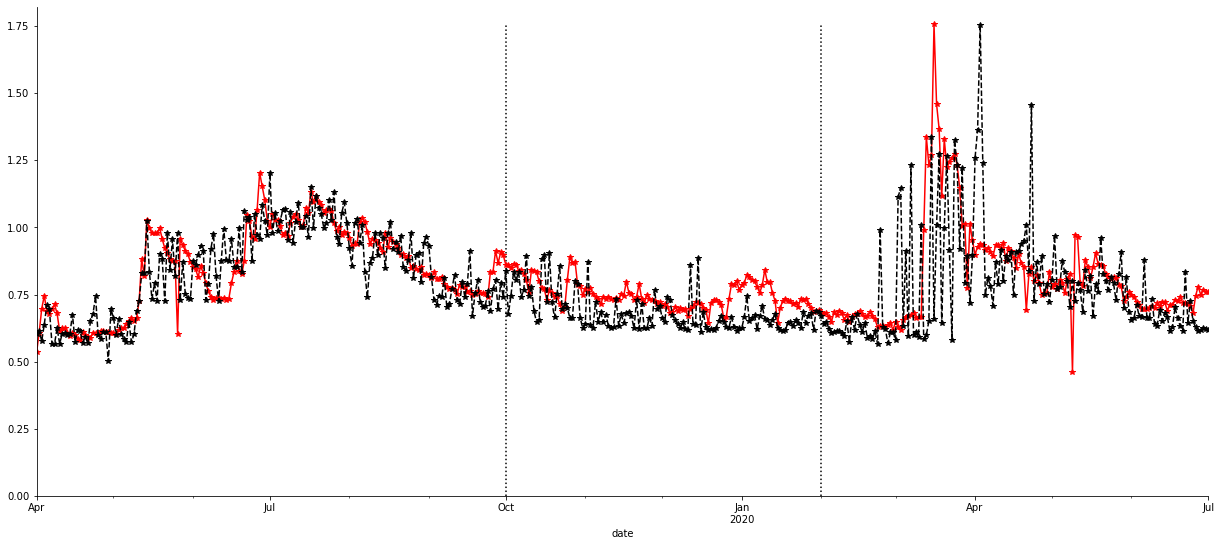

In [56]:
fig, ax = plt.subplots(figsize=(21, 9))
vg['SIGMA'].plot(ax=ax, label="Std", color = 'red',marker='*')
sigmas['BLACK_SCHOLES'].plot(ax=ax, label="Forecast", linestyle='dashed',color='black',marker='*')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_ylim(ymin=0)

ax.vlines('2019-10-01', 0, ymax=np.max(vg['SIGMA']), colors='black', linestyles='dotted') #, 
ax.vlines('2020-02-01', 0, ymax=np.max(vg['SIGMA']), colors='black', linestyles='dotted')

fig.savefig(f'_output/calibration/figures/vg_vol.pdf', transparent=True)
